In [222]:
from __future__ import division
import numpy as np
import scipy.misc
import os
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.autograd import Variable
from SR_datasets import SRCNN_dataset, SR_dataset
import torch
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
os.getcwd()


'/mnt/hdd1/thangvubk/workspace/NeuralNetwork/NeuralNetworkProject/VSR'

In [1]:
from SR_datasets import *

dataset = SRCNN_dataset(os.getcwd()+'/akiyo', phase='train')

In [3]:
len(dataset.paths)


300

In [7]:
from config import *


In [8]:
config.SRCNN_IMG_DIFF


12

In [9]:
SRCNN_IMG_DIFF


12

In [13]:
a = np.fromfunction(lambda i, j: i + j, (8, 8), dtype=int)

In [38]:
import scipy.ndimage
b = scipy.ndimage.interpolation.zoom(a, 1/2, prefilter=False)

/mnt/hdd1/thangvubk/workspace/.global_env/local/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [41]:
b

array([[[ 1],
        [ 3],
        [ 5],
        [ 7]],

       [[ 3],
        [ 5],
        [ 7],
        [ 9]],

       [[ 5],
        [ 7],
        [ 9],
        [11]],

       [[ 7],
        [ 9],
        [11],
        [13]]])

In [20]:
c = scipy.ndimage.interpolation.zoom(b, 2, prefilter=False)

In [21]:
c

array([[ 2,  3,  3,  4,  5,  6,  7,  7],
       [ 3,  3,  4,  5,  5,  6,  7,  7],
       [ 3,  4,  4,  5,  6,  7,  8,  8],
       [ 4,  5,  5,  6,  7,  8,  9,  9],
       [ 5,  5,  6,  7,  8,  9,  9, 10],
       [ 6,  6,  7,  8,  9, 10, 10, 11],
       [ 7,  7,  8,  9,  9, 10, 11, 11],
       [ 7,  7,  8,  9, 10, 11, 11, 12]])

In [24]:
type(4//2)

int

In [30]:
import torchvision.transforms as T

In [31]:
transforms = T.ToTensor()

In [32]:
transforms

In [33]:
transforms = T.CenterCrop(20)

In [35]:
a = a[:, :, np.newaxis]

In [37]:
a.shape

(8, 8, 1)

In [187]:
dataset = SR_dataset(os.getcwd()+'/akiyo')

dataloader = DataLoader(dataset, batch_size=10, shuffle=False)

dataiter = iter(dataloader)

low, high = dataiter.next()
low = Variable(low)

In [188]:
low.size()


torch.Size([10, 1, 96, 117])

In [190]:
print(torch.mean(low))

Variable containing:
 0.3477
[torch.FloatTensor of size 1]



In [377]:
a = scipy.misc.imread('Result/label_1.png', flatten=True, mode='YCbCr')

b = scipy.misc.imread('Result/output_1.png', flatten=True, mode='YCbCr')

imdiff = (a - b)

rmse = np.linalg.norm(imdiff)
rmse1 = np.sqrt(np.mean(imdiff**2))

psnr = 20*np.log10(255/rmse1)

In [378]:
psnr

25.384933635565275

In [361]:
20*np.log10(1/np.sqrt(0.00106))

29.746941347352298

In [358]:
np.sqrt(0.0012*256)

0.55425625842204074

In [218]:
87.39/39.26

2.225929699439633

In [311]:
a = scipy.misc.imread('akiyo2/image-0001.bmp', flatten=True, mode='YCbCr')

In [313]:
scipy.misc.imsave('akiyo2/temp.bmp', a)

In [314]:
b = scipy.misc.imread('akiyo2/temp.bmp', flatten=True, mode='YCbCr')

In [374]:
a


array([[ 252.,  252.,  251., ...,  253.,  253.,  253.],
       [ 253.,  252.,  250., ...,  251.,  251.,  253.],
       [ 252.,  251.,  250., ...,  251.,  251.,  253.],
       ..., 
       [ 112.,  111.,  106., ...,   53.,   42.,   50.],
       [ 116.,  112.,  104., ...,   61.,   47.,   49.],
       [ 111.,  104.,  101., ...,   58.,   48.,   44.]], dtype=float32)

In [369]:
b[:5, :5]

array([[ 41.,  42.,  42.,  42.,  42.],
       [ 40.,  40.,  40.,  41.,  41.],
       [ 39.,  39.,  40.,  40.,  40.],
       [ 40.,  40.,  40.,  41.,  41.],
       [ 41.,  41.,  42.,  42.,  42.]], dtype=float32)

In [318]:
from PIL import Image

In [320]:
a = Image.open('akiyo2/image-0001.bmp')


In [324]:
imga = a.convert('YCbCr')

In [336]:
with open('akiyo2/image-0001.bmp', 'rb') as f:
            with Image.open(f) as img:
                image = img.convert('YCbCr')

In [337]:
type(image)

PIL.Image.Image

In [341]:
img = np.array(image)

In [344]:
img[:, :, 0]

array([[36, 37, 39, ..., 26, 24,  3],
       [35, 37, 36, ..., 29, 25,  3],
       [36, 37, 36, ..., 26, 24,  3],
       ..., 
       [51, 51, 51, ..., 47, 45,  3],
       [51, 51, 51, ..., 47, 46,  3],
       [50, 50, 52, ..., 49, 44,  3]], dtype=uint8)

In [345]:
pilImg = Image.fromarray(img)

In [346]:
pilImg.save('akiyo2/temp.bmp')

In [347]:
with open('akiyo2/temp.bmp') as f:
            with Image.open(f) as img:
                image = img.convert('YCbCr')

In [348]:
img1= np.array(image)

In [349]:
img1[:, :, 0]

array([[ 98,  98,  99, ...,  93,  94,  89],
       [ 98,  98,  98, ...,  94,  94,  89],
       [ 98,  99,  98, ...,  95,  95,  89],
       ..., 
       [105, 105, 104, ..., 102, 101,  89],
       [105, 105, 104, ..., 102, 102,  89],
       [104, 104, 104, ..., 102, 101,  89]], dtype=uint8)

In [6]:

conv1 = nn.Conv2d(1, 64, 5, padding=2)
conv2 = nn.Conv2d(64, 32, 3, padding=1)
conv3 = nn.Conv2d(32, 9, 3, padding=1)
conv4 = nn.Conv2d(5, 32, 1)
conv5 = nn.ConvTranspose2d(32, 1, 9, stride=3)
def forward(x):
    x = conv3(conv2(conv1(x)))
    return x

y = forward(low)

In [7]:
y.size()

torch.Size([10, 9, 96, 117])

In [14]:
low.size()
y = [1,2]
y = torch.Tensor([1,2])
low[y].size()


TypeError: indexing a tensor with an object of type torch.FloatTensor. The only supported types are integers, slices, numpy scalars and torch.LongTensor or torch.ByteTensor as the only argument.

In [397]:
y.size()

torch.Size([10, 2, 284, 347])

In [400]:
deconv = nn.ConvTranspose2d(2, 1, 5)

In [401]:
low_temp = deconv(y)

In [402]:
low_temp.size()

torch.Size([10, 1, 288, 351])

In [404]:
low_temp

Variable containing:
( 0 , 0 ,.,.) = 
 -1.0126e-01 -1.2886e-01 -1.0082e-01  ...  -8.5247e-02 -1.1212e-01 -1.1804e-01
 -1.2935e-01 -1.5089e-01 -1.0386e-01  ...  -4.6491e-02 -9.0805e-02 -1.1252e-01
 -9.8513e-02 -1.2316e-01 -7.7634e-02  ...  -4.2536e-02 -8.5441e-02 -1.0851e-01
                 ...                   ⋱                   ...                
 -1.2824e-01 -1.1765e-01 -9.0062e-02  ...  -1.2554e-01 -1.5207e-01 -1.2638e-01
 -1.6437e-01 -1.5320e-01 -1.2554e-01  ...  -1.2826e-01 -1.5536e-01 -1.2911e-01
 -1.5517e-01 -1.5938e-01 -1.7557e-01  ...  -1.5153e-01 -1.3667e-01 -1.2795e-01
      ⋮  

( 1 , 0 ,.,.) = 
 -1.0126e-01 -1.2886e-01 -1.0082e-01  ...  -8.5243e-02 -1.1212e-01 -1.1804e-01
 -1.2935e-01 -1.5089e-01 -1.0386e-01  ...  -4.6481e-02 -9.0797e-02 -1.1251e-01
 -9.8513e-02 -1.2316e-01 -7.7634e-02  ...  -4.2518e-02 -8.5428e-02 -1.0851e-01
                 ...                   ⋱                   ...                
 -1.2824e-01 -1.1765e-01 -9.0062e-02  ...  -1.2554e-01 -1.5207e-0

In [405]:
low

Variable containing:
( 0 , 0 ,.,.) = 
  0.1370  0.1371  0.1374  ...   0.1015  0.1007  0.1003
  0.1361  0.1362  0.1364  ...   0.1021  0.1012  0.1008
  0.1338  0.1337  0.1335  ...   0.1032  0.1022  0.1018
           ...             ⋱             ...          
  0.1980  0.1985  0.1996  ...   0.1789  0.1783  0.1782
  0.1978  0.1984  0.1997  ...   0.1791  0.1785  0.1784
  0.1978  0.1984  0.1997  ...   0.1793  0.1787  0.1785
      ⋮  

( 1 , 0 ,.,.) = 
  0.1370  0.1371  0.1374  ...   0.1015  0.1007  0.1003
  0.1361  0.1362  0.1364  ...   0.1021  0.1012  0.1008
  0.1338  0.1337  0.1335  ...   0.1032  0.1022  0.1018
           ...             ⋱             ...          
  0.1980  0.1985  0.1996  ...   0.1789  0.1783  0.1782
  0.1978  0.1984  0.1997  ...   0.1791  0.1785  0.1784
  0.1978  0.1984  0.1997  ...   0.1793  0.1787  0.1785
      ⋮  

( 2 , 0 ,.,.) = 
  0.1370  0.1371  0.1375  ...   0.1015  0.1007  0.1003
  0.1362  0.1362  0.1364  ...   0.1021  0.1012  0.1008
  0.1338  0.1337  0.1335  

In [412]:
class a(object):
    def __init__(self, temp):
        self.temp = temp
class b(a):
    pass

var = b('temp')

In [411]:
var.temp

'temp'

In [470]:
ls

akiyo/      main.py    SCRNN_trained_model.pt  SR_datasets.pyc   Untitled.ipynb
akiyo2/     model.py   solver.py               Test/
config.py   model.pyc  solver.pyc              Train/
config.pyc  Result/    SR_datasets.py          trained_model.pt


In [471]:
os.path.exists('trained_model.pt')

True

In [33]:
 x= torch.Tensor([[1,2],[3,4]])

In [34]:
x



 1  2
 3  4
[torch.FloatTensor of size 2x2]

In [35]:
out = torch.zeros(2, 2)
out


 0  0
 0  0
[torch.FloatTensor of size 2x2]

In [36]:
x = Variable(x)
out = Variable(out)

In [37]:
out[0,0] = x[0, 0]

In [38]:
out[0,1] = x[0, 1]
out[1, 0] = x[1, 0]
out[1, 1] = x[1, 1]


In [39]:
z = torch.mean(out)

In [40]:
x.requires_grad = True

In [43]:
z.backward()

RuntimeError: there are no graph nodes that require computing gradients

In [53]:
x = np.fromfunction(lambda i, j, k: (i + j + 2*k), (2, 2, 2), dtype=int
                   )

In [54]:
x

array([[[0, 2],
        [1, 3]],

       [[1, 3],
        [2, 4]]])

In [55]:
x.reshape(2, 4)

array([[0, 2, 1, 3],
       [1, 3, 2, 4]])

In [56]:
x.transpose(0,2,1)

array([[[0, 1],
        [2, 3]],

       [[1, 2],
        [3, 4]]])

In [57]:
2*3**2

18

In [58]:
def shuffle(image):
    SH, SW, C = image.shape
    S = 3
    W = SW//S
    H = SH//S
    
    out = np.zeros((H, W, C*S**2))
    for h in range(H):
        for w in range(W):
            for c in range(C*S**2):
                out[h, w, c] = image[h*S + c//S%S, w*S + c%S, 0]
    return out


In [59]:
image = np.fromfunction(lambda i, j: (i + j), (9, 9), dtype=int)

In [60]:
image

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [61]:
image = image[:, :, np.newaxis]

In [63]:
image[:, :, 0]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [64]:
out = shuffle(image)

In [65]:
out.shape

(3, 3, 9)

In [74]:
out[:, :, 9]

IndexError: index 9 is out of bounds for axis 2 with size 9

In [26]:
temp = scipy.misc.imread('Test/Set5/butterfly_GT.bmp')

In [27]:
scipy.misc.imsave('temp.bmp', temp)

In [28]:
temp1 = scipy.misc.imread('temp.bmp')

In [29]:
temp1

array([[[ 42,  30,  22],
        [ 58,  43,  26],
        [ 85,  66,  42],
        ..., 
        [ 77,  59,  52],
        [ 74,  56,  49],
        [ 74,  56,  49]],

       [[ 41,  23,  12],
        [ 47,  29,  13],
        [ 54,  38,  19],
        ..., 
        [ 74,  56,  51],
        [ 75,  57,  53],
        [ 74,  56,  51]],

       [[ 80,  62,  46],
        [ 52,  32,  14],
        [ 42,  25,  12],
        ..., 
        [ 74,  58,  53],
        [ 75,  60,  53],
        [ 70,  54,  48]],

       ..., 
       [[ 98,  25,  24],
        [ 90,  33,  26],
        [ 96,  37,  25],
        ..., 
        [151, 101,  74],
        [151, 103,  75],
        [146, 101,  73]],

       [[100,  23,  23],
        [ 97,  30,  25],
        [117,  46,  39],
        ..., 
        [152, 105,  74],
        [150, 102,  74],
        [149, 104,  75]],

       [[110,  23,  27],
        [109,  30,  29],
        [122,  41,  42],
        ..., 
        [152, 105,  74],
        [150, 102,  74],
        [148, 103,

In [13]:
a =np.array([[0, 3, 2, 2, 4, 0, 3, 0],
       [2, 0, 0, 3, 3, 1, 3, 0],
       [2, 4, 4, 0, 2, 3, 1, 3],
       [0, 1, 3, 1, 0, 0, 0, 4],
       [2, 1, 1, 2, 1, 1, 3, 1],
       [0, 4, 0, 1, 0, 0, 2, 3],
       [3, 1, 3, 3, 3, 2, 3, 4],
       [0, 4, 1, 4, 2, 2, 0, 2]])

In [14]:
a

array([[0, 3, 2, 2, 4, 0, 3, 0],
       [2, 0, 0, 3, 3, 1, 3, 0],
       [2, 4, 4, 0, 2, 3, 1, 3],
       [0, 1, 3, 1, 0, 0, 0, 4],
       [2, 1, 1, 2, 1, 1, 3, 1],
       [0, 4, 0, 1, 0, 0, 2, 3],
       [3, 1, 3, 3, 3, 2, 3, 4],
       [0, 4, 1, 4, 2, 2, 0, 2]])

In [32]:
temp == temp1

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ..., 
       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ 

In [40]:
#os.makedirs('temp')
os.removedirs('temp')

In [128]:
from SR_datasets import DataAugment

In [129]:
da = DataAugment('Train')

In [130]:
type(da)

SR_datasets.DataAugment

In [131]:
da.augment()

In [116]:
os.walk('AugTrain/')

<generator object walk at 0x7f09d5e1ef00>

In [132]:
for root, _, path in os.walk('AugTrain/'):
    print(path)

['1220.bmp', '1041.bmp', '4190.bmp', '3366.bmp', '1959.bmp', '0300.bmp', '2725.bmp', '1608.bmp', '4294.bmp', '3484.bmp', '2201.bmp', '2302.bmp', '1623.bmp', '3345.bmp', '2860.bmp', '2300.bmp', '1542.bmp', '0794.bmp', '3429.bmp', '0242.bmp', '4020.bmp', '2022.bmp', '1632.bmp', '3527.bmp', '2071.bmp', '2574.bmp', '2108.bmp', '3294.bmp', '0681.bmp', '2200.bmp', '2911.bmp', '4341.bmp', '2467.bmp', '3215.bmp', '0403.bmp', '2843.bmp', '1039.bmp', '2636.bmp', '0627.bmp', '1204.bmp', '2462.bmp', '0855.bmp', '2207.bmp', '1616.bmp', '0522.bmp', '2213.bmp', '0764.bmp', '3688.bmp', '4264.bmp', '2592.bmp', '1325.bmp', '0676.bmp', '2983.bmp', '3473.bmp', '2007.bmp', '1190.bmp', '3063.bmp', '1291.bmp', '3650.bmp', '1332.bmp', '3053.bmp', '3541.bmp', '3504.bmp', '2757.bmp', '2621.bmp', '2588.bmp', '3064.bmp', '2772.bmp', '0752.bmp', '3709.bmp', '3766.bmp', '1503.bmp', '1462.bmp', '1683.bmp', '3315.bmp', '2521.bmp', '0701.bmp', '3392.bmp', '2023.bmp', '0193.bmp', '1901.bmp', '2716.bmp', '2144.bmp', '28

In [119]:
import cv2

In [121]:
a = cv2.imread('overfit/butterfly_GT.bmp', 0)

In [123]:
cv2.imwrite('temp.png', a/2)

True

In [124]:
b = cv2.imread('temp.png', 0)

In [125]:
b

array([[16, 23, 34, ..., 32, 30, 30],
       [14, 16, 20, ..., 30, 31, 30],
       [33, 18, 14, ..., 31, 32, 29],
       ..., 
       [24, 24, 26, ..., 56, 57, 56],
       [23, 24, 33, ..., 58, 56, 57],
       [24, 27, 32, ..., 58, 56, 56]], dtype=uint8)

In [126]:
a

array([[ 33,  46,  69, ...,  64,  61,  61],
       [ 27,  33,  41, ...,  61,  62,  61],
       [ 66,  36,  29, ...,  62,  64,  58],
       ..., 
       [ 47,  49,  53, ..., 113, 114, 111],
       [ 46,  49,  66, ..., 116, 113, 114],
       [ 49,  54,  65, ..., 116, 113, 113]], dtype=uint8)

In [127]:
a/2

array([[ 16.5,  23. ,  34.5, ...,  32. ,  30.5,  30.5],
       [ 13.5,  16.5,  20.5, ...,  30.5,  31. ,  30.5],
       [ 33. ,  18. ,  14.5, ...,  31. ,  32. ,  29. ],
       ..., 
       [ 23.5,  24.5,  26.5, ...,  56.5,  57. ,  55.5],
       [ 23. ,  24.5,  33. , ...,  58. ,  56.5,  57. ],
       [ 24.5,  27. ,  32.5, ...,  58. ,  56.5,  56.5]])

In [139]:
im = cv2.imread('Test/Set5/butterfly_GT.bmp', 0)

In [140]:
im

array([[ 33,  46,  69, ...,  64,  61,  61],
       [ 27,  33,  41, ...,  61,  62,  61],
       [ 66,  36,  29, ...,  62,  64,  58],
       ..., 
       [ 47,  49,  53, ..., 113, 114, 111],
       [ 46,  49,  66, ..., 116, 113, 114],
       [ 49,  54,  65, ..., 116, 113, 113]], dtype=uint8)

In [174]:
im1 = scipy.misc.imread('Test/Set5/butterfly_GT.bmp', flatten=True, mode='YCbCr')

In [176]:
im1[:,:]

array([[  31.37700081,   44.83499908,   67.41799927, ...,   62.75799942,
          59.75799942,   59.75799942],
       [  26.41600037,   31.91699982,   39.6780014 , ...,   59.39899826,
          60.6269989 ,   59.39899826],
       [  64.55799866,   34.40100098,   27.77499962, ...,   61.68700027,
          62.68700027,   57.68700027],
       ..., 
       [  45.29999924,   48.7179985 ,   52.86000061, ...,  111.57299805,
         113.63300323,  110.5510025 ],
       [  45.61000061,   48.75099945,   65.31700134, ...,  114.40499878,
         112.63300323,  113.32299805],
       [  48.35499954,   52.20800018,   64.80599976, ...,  114.40499878,
         112.63300323,  112.32299805]], dtype=float32)

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
im1 = im1[:, :, 0]
im1 = im1[:, :, np.newaxis]

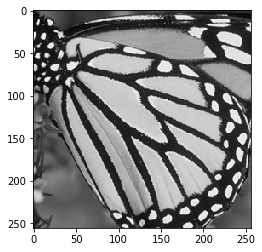

In [159]:
plt.imshow(im1[:, :, 0], cmap='gray')

In [161]:
im = cv2.imread('Test/Set5/butterfly_GT.bmp')

In [166]:
im[:, : , 0]

array([[22, 26, 42, ..., 52, 49, 49],
       [12, 13, 19, ..., 51, 53, 51],
       [46, 14, 12, ..., 53, 53, 48],
       ..., 
       [24, 26, 25, ..., 74, 75, 73],
       [23, 25, 39, ..., 74, 74, 75],
       [27, 29, 42, ..., 74, 74, 74]], dtype=uint8)

In [177]:
a = [1,2
    ]

In [179]:
a[0:
  -0]

[]

In [181]:
import h5py 
f = h5py.File('train.h5')
data = f.get('data')
sample = data[0, 0, :5, :5]
print(sample)


[[ 0.58405936  0.58899277  0.57442737  0.54929185  0.52882546]
 [ 0.5611828   0.5816133   0.57418978  0.55189222  0.53236741]
 [ 0.48174882  0.51876104  0.5381375   0.54794544  0.55005407]
 [ 0.37225938  0.42531461  0.48022297  0.53582543  0.56982428]
 [ 0.28468844  0.34177837  0.415975    0.49968475  0.55646169]]


In [182]:
np.mean(sample)

0.50982094

In [183]:
data.shape

(4352, 1, 33, 33)

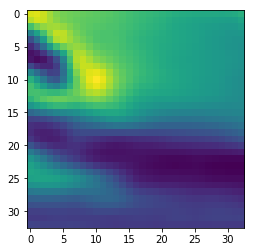

In [358]:
a = scipy.misc.imread('Test/Set5/butterfly_GT.bmp')

In [198]:
a[:5, :5, 2]

array([[ 22,  26,  42,  43,  53],
       [ 12,  13,  19,  34,  49],
       [ 46,  14,  12,  23,  25],
       [193, 102,  13,  23,  15],
       [ 74,  68,  24,  23,  19]], dtype=uint8)

In [200]:
b =scipy.misc.imread(a, flatten=False, mode='YCbCr')

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [359]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [65.738/256, 129.057/256, 25.064/256]) + 16

In [366]:
label = rgb2gray(a)
label = label[:255, :255]
label = np.round(label)

In [367]:
label[:5, :5]

array([[  44.,   55.,   75.,   84.,   96.],
       [  39.,   44.,   51.,   66.,   84.],
       [  72.,   47.,   41.,   47.,   56.],
       [ 198.,  120.,   39.,   41.,   40.],
       [  96.,   90.,   47.,   38.,   39.]])

In [319]:
c = scipy.misc.imread('Test/Set5/butterfly_GT.bmp', flatten=False, mode='YCbCr')

In [320]:
label = c[:, :, 0]
label = label/255
label = label[:255, :255]

In [321]:
low_res = scipy.ndimage.interpolation.zoom(label, 1/3)
low_res = scipy.ndimage.interpolation.zoom(low_res, 3)

In [376]:
print(psnr)

20.7816097971


In [381]:
im = scipy.misc.imread('Interpolate/Test/butterfly_GT.bmp')

In [382]:
low_res = im[:255, :255]

In [384]:
imdiff = low_res - label
rmse = np.sqrt(np.mean(imdiff**2))
psnr = 20*np.log10(255/rmse)
psnr

24.056822024831117

In [348]:
imdiff = imdiff.reshape(1, -1)

In [383]:
low_res

array([[ 55,  58,  63, ...,  72,  72,  72],
       [ 57,  59,  63, ...,  70,  70,  70],
       [ 65,  65,  64, ...,  65,  65,  65],
       ..., 
       [ 58,  61,  67, ..., 112, 112, 112],
       [ 57,  60,  70, ..., 113, 113, 113],
       [ 56,  60,  71, ..., 113, 113, 113]], dtype=uint8)

In [380]:
np.max(imdiff**2)

22500.0